In [56]:
import sys
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from importlib import reload

In [57]:

sys.path.insert(-1, "../") # it is important to add the script to path
import script.data as data
import script.utilities as utl


## Load data

In [96]:
reload(data)
# load the data
"""
The following function load the data from json file
    arguments:
        folder: string, the folder where all data lives
        fname:  list, a list of the sub-folder (workspace) names.
        temp: boolean, whether or not include the data_temp.json. If the simulation hasn't finished yet, it is useful to set it True
        data_name: a list of file name for all data json file.
                if you launch experiments multiple times in the same workspace, 
                which will happen if you want to continue to scan more parameter values for the same parameter type after some experiments
                the program will generate multiple data json file, (i.e. data.json, data_3.json, data_3.1.json, etc).
                In this case, you can include all the data json file in this list
    return:
        a list of MyData objects
"""
test_data = data.load_data(
    folder="output/",
    fname=["test"],
    temp=False,
    data_name=["data.json"],
)
# the length of the test_data is equal to the length of fname list
print(len(test_data))

1


## Get data

In [97]:
# all the keys
print(test_data[0].dataset.keys())

dict_keys(['prms', 'prms2', 'tr', 'tr_std', 'tstd', 'tstd_std', 'fr', 'fr_std', 'fstd', 'fstd_std', 'tr_all', 'tr_all_std', 'nag', 'nag_std', 'nstd', 'nstd_std', 'nag_antag', 'nag_antag_std', 'nstd_antag', 'nstd_antag_std', 'nag_all', 'nag_all_std', 'm2max', 'm2max_std', 'm2mstd', 'm2mstd_std', 'm1max', 'm1max_std', 'm1mstd', 'm1mstd_std', 'mmax', 'mmax_std', 'mmstd', 'mmstd_std', 'm2max_all', 'm2max_all_std', 'tr_most_prob', 'tr_most_prob_std', 'tr_median', 'tr_median_std', 'ntot', 'ntot_std', 'nstd_tot', 'nstd_tot_std', 'm1tot', 'm1tot_std', 'm2tot', 'm2tot_std', 'fra', 'fra_std', 'frb', 'frb_std', 'm1stdtot', 'm1stdtot_std', 'm2stdtot', 'm2stdtot_std', 'fstdra', 'fstdra_std', 'fstdrb', 'fstdrb_std', 'eta_bar', 'eta_bar_std', 'eta_var', 'eta_var_std', 'etastd_bar', 'etastd_bar_std', 'etastd_var', 'etastd_var_std', 'nag1', 'nag1_std', 'nag2', 'nag2_std', 'nstd1', 'nstd1_std', 'nstd2', 'nstd2_std', 'nag3', 'nag3_std', 'nag4', 'nag4_std', 'nstd3', 'nstd3_std', 'nstd4', 'nstd4_std', 'eb_

In [98]:

print("Parameter scanned: ", test_data[0].get("prms")) # parameter scanned

Parameter scanned:  [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [99]:
print("Well-mixed scenario: ")
print("> Extraction of Ag1: ", test_data[0].get("nag"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_std"))
print("> Extraction of Ag2: ", test_data[0].get("nag_antag"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd_antag"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_antag_std"))

Well-mixed scenario: 
> Extraction of Ag1:  [14.355 14.665 14.185 14.685 12.695 10.11   7.585  6.67   7.88   9.1
  9.94  10.075 10.475 10.975 10.575 10.205]
  s.t.d. within a B cell:  [4.19679436 4.18495522 3.505045   3.20896809 3.63234672 3.6284864
 3.27147408 2.53166509 2.59222311 3.08139926 2.6285463  3.14719856
 3.28398943 3.07314952 2.77941833 2.88657751]
  s.t.d. between B cells (uncertainty):  [1.72553615 1.43117958 1.2618538  1.04655387 0.95523557 1.53456834
 1.12972342 0.85621259 0.87555697 0.76419893 1.2563439  0.92567543
 1.47474574 0.93961428 0.96222399 1.17152678]
> Extraction of Ag2:  [1.5000e-02 2.0000e-02 9.0000e-02 1.5000e-01 5.0500e-01 1.1300e+00
 2.3950e+00 4.1050e+00 6.8900e+00 1.1110e+01 1.4460e+01 1.8160e+01
 2.0660e+01 2.2560e+01 2.3565e+01 2.4625e+01]
  s.t.d. within a B cell:  [0.035      0.06       0.19582576 0.318992   0.65137852 0.9515483
 1.48780946 1.96428611 2.48143352 3.35834575 3.53510823 4.23487903
 4.55018846 4.8725377  4.36550104 4.37338646]
  s.t.d.

In [100]:
print("Segregated scenario: all Ag1, no Ag2")
print("> Extraction of Ag1: ", test_data[0].get("nag_seg"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd_seg"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_seg_std"))
print("> Extraction of Ag2: ", test_data[0].get("nag_antag_seg"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd_antag_seg"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_antag_seg_std"))

Segregated scenario: all Ag1, no Ag2
> Extraction of Ag1:  [16.245 16.405 15.985 15.905 16.055 16.55  16.14  16.295 16.355 16.53
 15.76  17.445 16.295 16.015 16.265 17.12 ]
  s.t.d. within a B cell:  [4.09818667 4.40593779 4.31724707 4.10812348 4.18010881 4.26943687
 4.42369514 4.49439573 4.36424287 4.99945147 4.50430543 4.5725643
 4.5021886  4.30373474 4.26628829 4.50396955]
  s.t.d. between B cells (uncertainty):  [1.5170613  1.78507003 1.43362303 1.23833558 1.63293448 1.16038787
 1.56185787 1.464744   1.54966932 1.62021603 1.10788086 1.27022636
 1.80955105 2.07972955 1.42030807 1.25323581]
> Extraction of Ag2:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  s.t.d. within a B cell:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  s.t.d. between B cells (uncertainty):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [101]:
print("Segregated scenario: all Ag2, no Ag1")
print("> Extraction of Ag1: ", test_data[0].get("nag_seg2"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd_seg2"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_seg2_std"))
print("> Extraction of Ag2: ", test_data[0].get("nag_antag_seg2"))
print("  s.t.d. within a B cell: ", test_data[0].get("nstd_antag_seg2"))
print("  s.t.d. between B cells (uncertainty): ", test_data[0].get("nag_antag_seg2_std"))

Segregated scenario: all Ag2, no Ag1
> Extraction of Ag1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  s.t.d. within a B cell:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  s.t.d. between B cells (uncertainty):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
> Extraction of Ag2:  [1.0000e-02 5.0000e-03 2.4000e-01 6.2500e-01 1.0600e+00 2.0250e+00
 3.3100e+00 7.3200e+00 1.4220e+01 2.3485e+01 3.4880e+01 4.5725e+01
 5.1340e+01 5.6170e+01 5.7400e+01 6.0045e+01]
  s.t.d. within a B cell:  [0.03       0.015      0.43507277 0.67731677 1.07042554 1.35503058
 1.82705312 2.77908439 4.01288172 5.09237113 5.88273899 7.06806347
 7.3730383  7.234542   8.00331138 8.1221843 ]
  s.t.d. between B cells (uncertainty):  [0.03       0.02179449 0.14628739 0.29643718 0.32619013 0.44595403
 0.7628237  0.86174242 1.51611345 1.79283993 1.90620041 2.58686586
 2.3087659  2.04159252 2.39874967 2.78719841]


## Post-processing

In [106]:
# Depending how you define the cross-reactive-score, the following function can be modified
def calculate_cross_reactive_score(nag1_mix, nag2_mix, nag1_seg, nag2_seg):
    ntot_mix = nag1_mix + nag2_mix
    ntot_seg = (nag1_seg + nag2_seg) / 2
    return (ntot_mix - ntot_seg) / (ntot_mix + ntot_seg)

## Plot the data

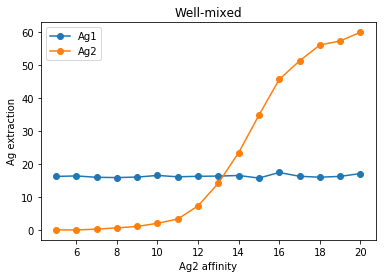

In [103]:
## segregated

# Ag1 extraction vs Ag2 affinity
plt.plot(
    test_data[0].get("prms"),
    test_data[0].get("nag_seg"),
    '-o',
    label="Ag1"
)
# Ag2 extraction vs Ag2 affinity
plt.plot(
    test_data[0].get("prms"),
    test_data[0].get("nag_antag_seg2"),
    '-o',
    label="Ag2"
)
plt.xlabel("Ag2 affinity")
plt.ylabel("Ag extraction")
plt.legend()
plt.title("Well-mixed")
plt.show()

If antigens are segregated, there is no interactions beteen them within our model setup. Thus, it is expected that the change in Ag2 affinity has no effect on the extraction of Ag1. 

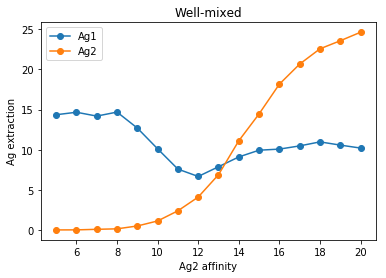

In [104]:
## well mixed

# Ag1 extraction vs Ag2 affinity
plt.plot(
    test_data[0].get("prms"),
    test_data[0].get("nag"),
    '-o',
    label="Ag1"
)
# Ag2 extraction vs Ag2 affinity
plt.plot(
    test_data[0].get("prms"),
    test_data[0].get("nag_antag"),
    '-o',
    label="Ag2"
)
plt.xlabel("Ag2 affinity")
plt.ylabel("Ag extraction")
plt.legend()
plt.title("Well-mixed")
plt.show()

However, if antigens are well mixed, they interact with each other through complicated processes:
- They cooperatively form clusters to trigger the force
- Togehter they share the force during the initial extraction stage (coorperative)
- If one type of antigens gets entirely extracted, all the force will be acting on the other antigen type, inhibiting the acquisition of the later type (inhibitive).


Therefore, the overall effect can be coorperative or inhibitive, depending on which interaction type dominates. We can see as Ag2 affinity increases, Ag1 extraction first decreases then increases. The decrease might be because Ag2 is getting better to trigger the force but not good enough to be able to share the force in the late stage. When Ag2 affinity is good enough (i.e. exceeds Ag1 affinity (13.3kT)), Ag1 extraction increases as Ag2 affinity improves. 

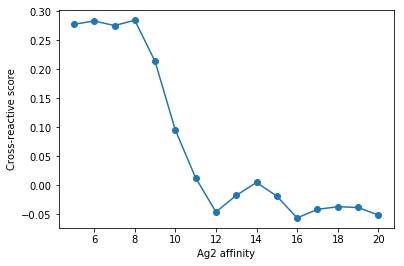

In [107]:
plt.plot(
    test_data[0].get("prms"), 
    calculate_cross_reactive_score(
        test_data[0].get("nag"),
        test_data[0].get("nag_antag"),
        test_data[0].get("nag_seg"),
        test_data[0].get("nag_antag_seg2")
    ),
    '-o'
)
plt.xlabel("Ag2 affinity")
plt.ylabel("Cross-reactive score")
plt.show()